## For assignment 4

#### This project is an extension of assignment 2, to a 2D feature space and to
####  a classification problem. You will note that the accuracy of the model
####  is not that high, suggesting that the model may not be the most
####  appropriate for the proposed data.

In [127]:
#Soham Joshi U00304073

In [128]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### First, the (simulated) data.

In [129]:

# red class  =  class 0

x0 = np.random.normal(2, 1, (60, 1))
y0 = np.random.normal(1, 1, (60, 1))

# green class  =  class 1

x1 = np.random.normal(5, 1, (70, 1))
y1 = np.random.normal(4, 1, (70, 1))

# blue class  =  class 2

x2 = np.random.normal(3, 1, (80, 1))
y2 = np.random.normal(7, 1, (80, 1))

# yellow class  =  class 3

x3 = np.random.normal(8, 1, (90, 1))
y3 = np.random.normal(0, 1, (90, 1))



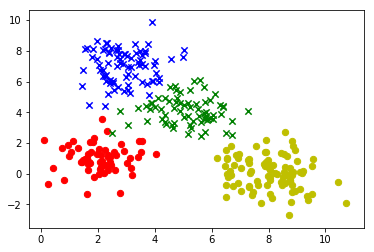

In [130]:
plt.scatter(x0, y0, c='r', marker='o', s=40)
plt.scatter(x1, y1, c='g', marker='x', s=40)
plt.scatter(x2, y2, c='b', marker='x', s=40)
plt.scatter(x3, y3, c='y', marker='o', s=40)

plt.show()

###  Combine the data into a single tensor.

In [131]:
d0 = np.hstack((x0, y0))
d1 = np.hstack((x1, y1))
d2 = np.hstack((x2, y2))
d3 = np.hstack((x3, y3))

feature_xy = np.vstack((d0, d1, d2, d3))

In [132]:
#   show shape of feature_xy
feature_xy.shape

(300, 2)

### Make one-hot encoding of the (desired) target classes

In [133]:
expected_class = np.matrix([[1., 0., 0., 0.]] * len(x0) \
                        +  [[0., 1., 0., 0.]] * len(x1) \
                        +  [[0., 0., 1., 0.]] * len(x2) \
                        +  [[0., 0., 0., 1.]] * len(x3) )

### Shuffle the data points (and corresponding classes)
### to avoid skewing the learning.

In [134]:
indices = np.arange(feature_xy.shape[0])

np.random.shuffle(indices)

feature_xy = feature_xy[indices, :]

expected_class = expected_class[indices, :]

### The usual.

In [135]:
import tensorflow as tf

### Hyper-parameters.   Play with these, to see if they make a difference.

In [136]:
learning_rate = 0.04 #Changing the learning rate from 0.03 to 0.04 increased the accuracy
training_epochs = 9000

num_classes = 4
batch_size = 100

###  The feature tensor shape.

In [137]:
training_size, num_features = feature_xy.shape

###  1. Make placeholders X and Y for model inputs and corresponding desired classes.

In [138]:
X = tf.placeholder("float", shape=[None, 2])
Y = tf.placeholder("float", shape=[None, 4])

### 2. Make variables W and b for the weights and biases of the TensorFlow model.

In [139]:
w = tf.Variable(tf.random_normal([2, 4]), name="weights")
b = tf.Variable(tf.random_normal([4]), name="bias")

###  3. Define the model, i.e. the model output.  I just call it model.
###      Use the sigmoid activation. Softmax the output, of course.

In [140]:
output1 = tf.matmul(X, w)
output2 = tf.add(output1, b)
sigmd = tf.nn.sigmoid(output2)
model = tf.nn.softmax(sigmd)

### 4. Define the loss (cost) function as the cross-entropy 
### between desired class and actual class computed by model.

In [141]:
output_y = tf.clip_by_value(model, 1e-10, 0.9999999)
loss = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(output_y) + (1 - Y) * tf.log(1 - output_y), axis=1))

### 5. Define minimizer for the loss function.

In [142]:
minimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

### 6. Make the Session object, and
###     initialize global variables.

In [143]:
init = tf.global_variables_initializer()

In [144]:
sess = tf.Session()

In [145]:
sess.run(init)

### The batch training

In [146]:
for step in range(training_epochs * training_size // batch_size):
    offset = (step * batch_size) % training_size
    batch_data = feature_xy[offset:(offset + batch_size), :]
    batch_classes = expected_class[offset:(offset + batch_size)]
    err, _ = sess.run([loss, minimizer], feed_dict={X: batch_data, Y: batch_classes})
    if step % 200 == 0:
        print (step, err)

0 2.1067462
200 2.0387504
400 2.042334
600 1.9880887
800 2.0095065
1000 1.9934726
1200 1.9633172
1400 1.9845605
1600 1.9062912
1800 1.897493
2000 1.9204624
2200 1.8607488
2400 1.869678
2600 1.8958021
2800 1.836112
3000 1.8519301
3200 1.8780549
3400 1.818572
3600 1.8390188
3800 1.8646572
4000 1.8055663
4200 1.8293074
4400 1.8543128
4600 1.7956356
4800 1.8218006
5000 1.8461298
5200 1.7878379
5400 1.8158455
5600 1.8394983
5800 1.781558
6000 1.8110081
6200 1.834005
6400 1.776387
6600 1.8069965
6800 1.8293655
7000 1.7720473
7200 1.8036095
7400 1.8253813
7600 1.7683458
7800 1.8007053
8000 1.8219107
8200 1.765145
8400 1.798182
8600 1.81885
8800 1.7623434
9000 1.7959645
9200 1.8161224
9400 1.7598671
9600 1.7939961
9800 1.81367
10000 1.7576581
10200 1.792234
10400 1.8114468
10600 1.7556726
10800 1.790644
11000 1.8094181
11200 1.7538756
11400 1.7892008
11600 1.807556
11800 1.7522397
12000 1.7878822
12200 1.8058375
12400 1.7507422
12600 1.7866719
12800 1.8042444
13000 1.749365
13200 1.7855552
134

###  7. Show the weights and biases obtained for the model, after training.

In [147]:
print("Weight w is:", w)
print("Bias b is:", b)

Weight w is: <tf.Variable 'weights_4:0' shape=(2, 4) dtype=float32_ref>
Bias b is: <tf.Variable 'bias_4:0' shape=(4,) dtype=float32_ref>


###  Make a few predictions.

In [148]:
feed_dict = { X: [[8.0,-1.0]] }    # input X must be of shape [None,2]
c_vector = sess.run(model, feed_dict)
c_number = sess.run(tf.argmax(c_vector,1))
print(c_number)

[0]


In [149]:
feed_dict = { X: [[10.0, 4.0]] }    # input X must be of shape [None,2]
c_vector = sess.run(model, feed_dict)
c_number = sess.run(tf.argmax(c_vector,1))
print(c_number)

[1]


In [150]:
feed_dict = { X: [[15.0,20.0]] }    # input X must be of shape [None,2]
c_vector = sess.run(model, feed_dict)
c_number = sess.run(tf.argmax(c_vector,1))
print(c_number)

[1]


In [151]:
feed_dict = { X: [[-6.0,1.0]] }    # input X must be of shape [None,2]
c_vector = sess.run(model, feed_dict)
c_number = sess.run(tf.argmax(c_vector,1))
print(c_number)

[0]


### Making an accuracy node.

In [152]:
true_pred = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(true_pred, "float"))

### Use on the original data.

In [153]:
training_accuracy = sess.run([accuracy], feed_dict={X: feature_xy, Y: expected_class})

In [154]:
print(training_accuracy)

[0.42666668]


### 8. Make test data similar to the provided data above.
###     Just 10 datapoints for each of the 4 classes.

In [155]:
# red class  =  class 0

w0 = np.random.normal(2, 1, (10, 1))
z0 = np.random.normal(1, 1, (10, 1))

# green class  =  class 1

w1 = np.random.normal(5, 1, (10, 1))
z1 = np.random.normal(4, 1, (10, 1))

# blue class  =  class 2

w2 = np.random.normal(3, 1, (10, 1))
z2 = np.random.normal(7, 1, (10, 1))

# yellow class  =  class 3

w3 = np.random.normal(8, 1, (10, 1))
z3 = np.random.normal(0, 1, (10, 1))


In [156]:
a0 = np.hstack((w0, z0))
a1 = np.hstack((w1, z1))
a2 = np.hstack((w2, z2))
a3 = np.hstack((w3, z3))

newfeature_xy = np.vstack((a0, a1, a2, a3))

newfeature_xy.shape

newexpected_class = np.matrix([[1., 0., 0., 0.]] * len(w0) \
                        +  [[0., 1., 0., 0.]] * len(w1) \
                        +  [[0., 0., 1., 0.]] * len(w2) \
                        +  [[0., 0., 0., 1.]] * len(w3) )

new_indices = np.arange(newfeature_xy.shape[0])

np.random.shuffle(new_indices)

newfeature_xy = newfeature_xy[new_indices, :]

newexpected_class = newexpected_class[new_indices, :]


new_training_size, new_num_features = newfeature_xy.shape


new_batch_size = 85

###  9. Run the training on the test data.

In [157]:
new_init = tf.global_variables_initializer()

# run initializer
new_sess = tf.Session()
new_sess.run(new_init)

In [158]:
for new_step in range(training_epochs * new_training_size // new_batch_size):
    offset = (step * new_batch_size) % new_training_size
    new_batch_data = new_feature_xy[offset:(offset + new_batch_size), :]
    new_batch_classes = new_expected_class[offset:(offset + new_batch_size)]
    new_err, new_ = sess.run([loss, minimizer], feed_dict={X: new_batch_data, Y: new_batch_classes})
    if new_step % 200 == 0:
        print (new_step, new_err)

0 1.6992155
200 1.6981022
400 1.6975886
600 1.6973168
800 1.6971428
1000 1.6970122
1200 1.6969045
1400 1.6968111
1600 1.6967281
1800 1.696653
2000 1.696584
2200 1.6965202
2400 1.6964607
2600 1.696405
2800 1.6963524
3000 1.6963027
3200 1.696255
3400 1.6962097
3600 1.6961664
3800 1.6961247
4000 1.6960846
4200 1.6960456


###  10. Use accuracy node on your test data.

In [159]:
feed_dict = { X: [[8.0,-1.0]] }    # input X must be of shape [None,2]
c_vector = sess.run(model, feed_dict)
c_number = sess.run(tf.argmax(c_vector,1))
print(c_number)

[0]


In [160]:
new_pred = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(new_pred, "float"))

new_accuracy = sess.run([accuracy], feed_dict={X: newfeature_xy, Y: newexpected_class})

print(new_accuracy)

[0.5]
